In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

## 1번

In [3]:
#1번
df = pd.read_csv('kor_opendata_minwon_20201231.csv',encoding='euc-kr')
df = df.dropna()
df.head()

,년도,처리건수,평균처리일_전체,평균처리일_시정권고,평균처리일_의견표명,평균처리일_조정합의,평균처리일_심의안내,평균처리일_기 각,평균처리일_기 타
0,2008.0,27509.0,29.0,54.0,68.0,34.0,41.0,50.0,17.0
1,2009.0,28163.0,23.0,58.0,62.0,32.0,44.0,49.0,13.0
2,2010.0,34510.0,21.0,54.0,59.0,31.0,52.0,46.0,15.0
3,2011.0,32082.0,17.0,45.0,59.0,27.0,42.0,42.0,14.0
4,2012.0,33242.0,15.0,55.0,53.0,26.0,41.0,55.0,11.0


In [4]:
df.rename(columns = {'평균처리일_전체' : '전체',
'평균처리일_시정권고' : '시정권고',
'평균처리일_의견표명' : '의견표명',
'평균처리일_조정합의' : '조정합의',
'평균처리일_심의안내' : '심의안내',
'평균처리일_기 각' : '기각',
'평균처리일_기 타' : '기타'
}, inplace=True)
df

,년도,처리건수,전체,시정권고,의견표명,조정합의,심의안내,기각,기타
0,2008.0,27509.0,29.0,54.0,68.0,34.0,41.0,50.0,17.0
1,2009.0,28163.0,23.0,58.0,62.0,32.0,44.0,49.0,13.0
2,2010.0,34510.0,21.0,54.0,59.0,31.0,52.0,46.0,15.0
3,2011.0,32082.0,17.0,45.0,59.0,27.0,42.0,42.0,14.0
4,2012.0,33242.0,15.0,55.0,53.0,26.0,41.0,55.0,11.0
5,2013.0,32737.0,18.0,33.0,44.0,23.0,38.0,31.0,16.0
6,2014.0,28744.0,16.0,41.0,54.0,29.0,43.0,38.0,12.0
7,2015.0,23573.0,18.0,49.0,54.0,32.0,50.0,43.0,14.0
8,2016.0,21080.0,17.0,48.0,53.0,34.0,44.0,48.0,12.0
9,2017.0,16149.0,19.0,59.0,55.0,34.0,49.0,49.0,14.0


In [5]:
df = pd.melt(df,["년도"], var_name="처리항목", value_name="평균처리일")
df['평균처리일'] = df['평균처리일'].astype(int)
df['년도'] = df['년도'].astype(int)

In [6]:
df

,년도,처리항목,평균처리일
0,2008,처리건수,27509
1,2009,처리건수,28163
2,2010,처리건수,34510
3,2011,처리건수,32082
4,2012,처리건수,33242
...,...,...,...
99,2016,기타,12
100,2017,기타,14
101,2018,기타,12
102,2019,기타,12


## 2번

#### 2-4번

In [14]:
#2-4번
df = pd.read_excel('survey15.xlsx')
df.head()
df['old'] = [2021 - y + 1 for y in df['birth_years']]

In [15]:
df.columns

Index(['pannel_id', 'sex', 'birth_years', 'married', 'job_type', 'salary',
       'major', 'donation', 'drink_qty', 'drink_freq', 'old'],
      dtype='object')

In [8]:
bins = list(range(0,2201, 100))
bins_labels = [ str(x)+"미만" for x in bins[1:]]
df['salary_bin'] = pd.cut(df['salary'], bins, right=False, labels=bins_labels[:])

In [9]:
old_salary = df.groupby('old')['salary'].agg(**{
'salary_mean':'mean',
'salary_median':'median'
}).reset_index()

In [10]:
sex_old_salary = df.groupby(['sex','old'])['salary'].agg(**{
'salary_mean':'mean',
'salary_median':'median'
}).reset_index() ## 성별 월급
sex_old_salary[sex_old_salary['sex']==1].mean()



sex                1.000000
old               52.060606
salary_mean      263.878204
salary_median    242.847222
dtype: float64

In [11]:
sex_old_salary[sex_old_salary['sex']==2].mean()

sex                2.000000
old               53.607843
salary_mean      155.013011
salary_median    139.364865
dtype: float64

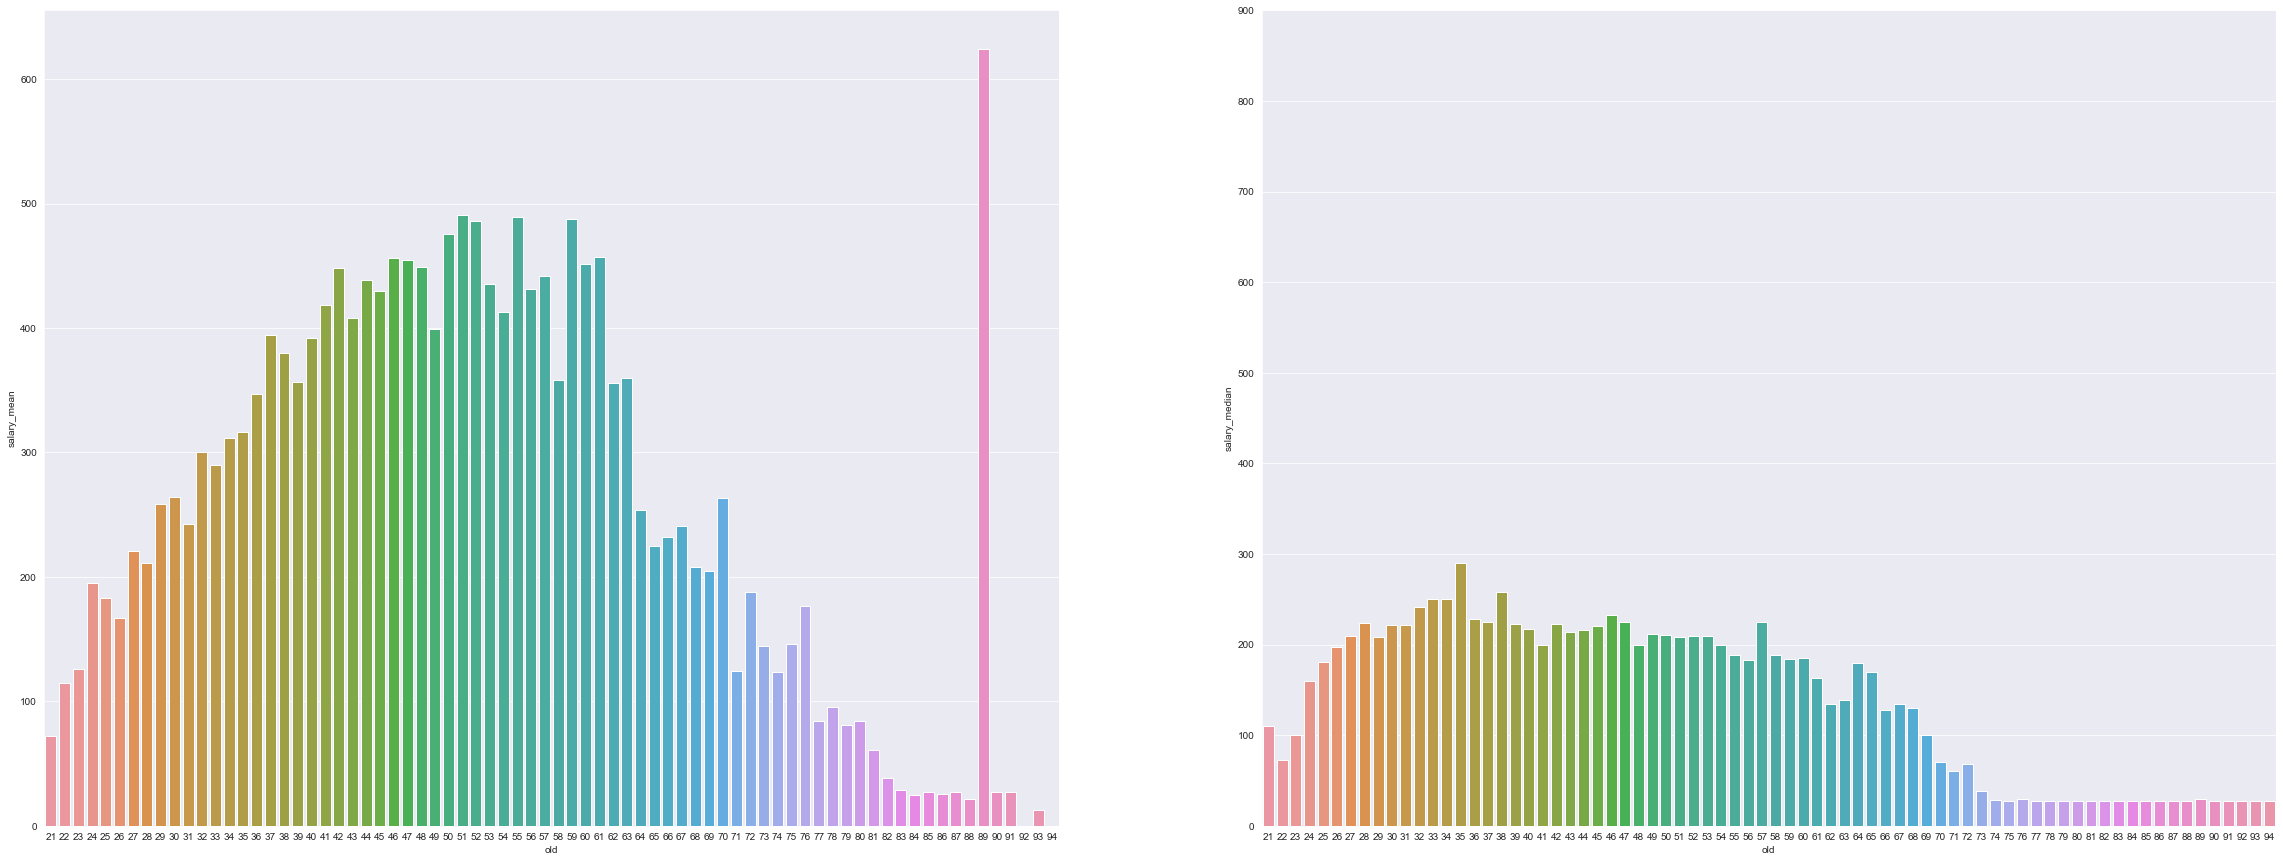

In [12]:
df = df.sort_values(by='sex')
sns.set_style('darkgrid')
fig = plt.figure(figsize=(40, 15))
area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)
plt.xlim(19,80)
plt.ylim(0,900)
sns.barplot(data =sex_old_salary[sex_old_salary['sex']==1].loc[18:91], x="old", y="salary_mean", ax = area1)
sns.barplot(data =sex_old_salary[sex_old_salary['sex']==2].loc[117:190], x="old", y="salary_median", ax = area2)

plt.show()

In [13]:
#분석 결과
#1. 21살에 여성이 남성보다 월급을 더 많이 받는다.
#2. 남성은 51세에 가장 많은 월급을 받고 여성은 35세에 가장 많은 월급을 받는다.
#3. 여성보다 남성이 더 오랜기간 많은 월급을 받는다.
